In [2]:
import numpy as np
import pandas as pd

# two-class classification
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', dtype = None, delimiter=';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype = None, delimiter=';')

print(data_red)
print(data_white)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
# input / to_numpy -> table 안 숫자만 들어감
X0 = data_red.to_numpy()
X1 = data_white.to_numpy()

N0,D = X0.shape
N1,D = X1.shape

#print(X0)

# target
t0 = np.zeros(N0, dtype = int)
t1 = np.ones(N1, dtype = int)

# 전체 dataset
X = np.vstack((X0, X1)) # input, 12차원 입력
t = np.hstack((t0, t1)) # output, target, {0, 1}로 구분    t는 벡터 

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [11]:
import sklearn.preprocessing
X = sklearn.preprocessing.normalize(X) 
N,D = X.shape

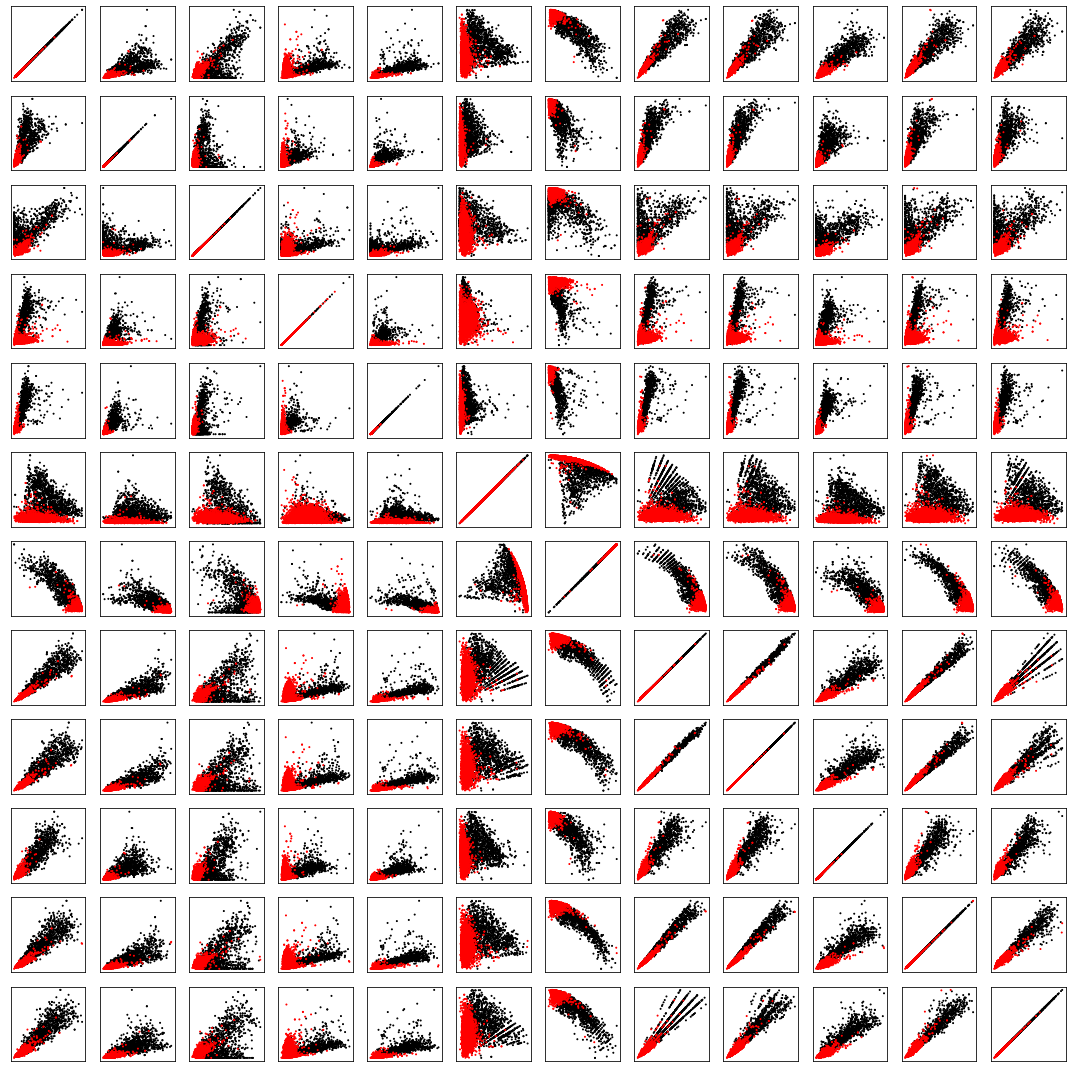

In [15]:
import matplotlib
import matplotlib.pyplot as plt

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])

plt.figure(figsize = (15,15))
for i in range(0,D):
    for j in range(0,D):
        plt.subplot(D,D,i*D + j + 1)
        plt.scatter(X[:,i],X[:,j], c = t, s = 1, cmap = cmap_sample, vmin = 0, vmax = +1)
        
        ax = plt.gca()
#         plt.xlabel('input' + str(i))
#         plt.ylabel('input' + str(j))
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

plt.tight_layout()

In [17]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# train / test 쪼개기
X_train,X_test,t_train,t_test = train_test_split(X, t, test_size = 0.20)
# 0.2는 20퍼센트(test 비율) 

#   classifier 모델 생성
model1 = svm.SVC(kernel = 'rbf')  #SVC -> support vector machine 사용한 classifier,kernel 그냥 받아들이기
model2 = LogisticRegression()
model3 = Perceptron()
 
# classifier 모델 학습
model1.fit(X_train,t_train)
model2.fit(X_train,t_train)
model3.fit(X_train,t_train)

# 예측 수행
t1_train = model1.predict(X_train)
t1_test = model1.predict(X_test)
t2_train = model2.predict(X_train)
t2_test = model2.predict(X_test)
t3_train = model3.predict(X_train)
t3_test = model3.predict(X_t est)

# accuracy를 구함
print(sklearn.metrics.accuracy_score(t_train, t1_train)) # SVM, training accuracy
print(sklearn.metrics.accuracy_score(t_test, t1_test)) # SVM, test accuracy
print(sklearn.metrics.accuracy_score(t_train, t2_train)) # Logistic, training accuracy
print(sklearn.metrics.accuracy_score(t_test, t2_test)) # Logistic, test accuracy
print(sklearn.metrics.accuracy_score(t_train, t3_train)) # Perceptron, training accuracy
print(sklearn.metrics.accuracy_score(t_test, t3_test)) # Perceptron, test accuracy

0.9384260150086589
0.9307692307692308
0.9253415431979989
0.9176923076923077
0.9424668077737156
0.9376923076923077
